In [2]:
from neurodiffeq import diff
from neurodiffeq.solvers import Solver1D, Solver2D
from neurodiffeq.conditions import IVP, DirichletBVP2D
from neurodiffeq.networks import FCNN, SinActv, Resnet
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import torch
import torch.nn as nn
from neurodiffeq.generators import Generator1D
from neurodiffeq.monitors import Monitor1D
# %matplotlib notebook

In [3]:
g = 1.0
l = 1.0
def simple_pendulum(t,x):
    y =  np.zeros(len(x))
    y[0] = x[1]
    y[1] = -g*np.sin(x[0])/l
    return y

In [5]:
def ode_system(theta, t): 
    return [diff(theta,t,order = 2)+g*torch.sin(theta)/l]

conditions = [IVP(t_0=0.0, u_0=1.0)]
# net_ho = FCNN(
#     n_input_units=1,
#     n_output_units=1,
#     hidden_units=(128,128,128,128,128,128,128,128,128,128),
#     actv=SinActv,
# )
nets = [FCNN(actv=SinActv)]
# g1 = Generator1D(size=1000, t_min=0.1, t_max=5.0, method='equally-spaced', noise_std=0.0001)
# g1 = Generator1D(size=5000, t_min=0.1, t_max=5.0, method='equally-spaced')
# monitor = Monitor1D(t_min=0.1, t_max=5.0, check_every=100)

# nets = [net_ho]

solver = Solver1D(ode_system, conditions, t_min=0.1, t_max=5.0, nets=nets)
# solver = Solver1D(ode_system, conditions, t_min=0.1, t_max=5.0, nets=nets, train_generator=g1, valid_generator=g1)


# solver.fit(max_epochs=1000, callbacks=[monitor.to_callback()])
solver.fit(max_epochs=10000)
solution = solver.get_solution()

Training Progress:   0%|                              | 0/10000 [00:00<?, ?it/s]

In [6]:
t = np.linspace(0.1, 5.0, 5000)
theta = solution(t, to_numpy=True)

In [7]:
# %matplotlib

In [8]:
# t = np.linspace(0.1,5.0,400)
x0 = np.array([1.0,0.0])
y_out = solve_ivp(simple_pendulum, t_span = [0.1, 5.0], y0 = x0, method='RK45', t_eval=t)

# Extract the solution
theta_an = y_out.y[0]

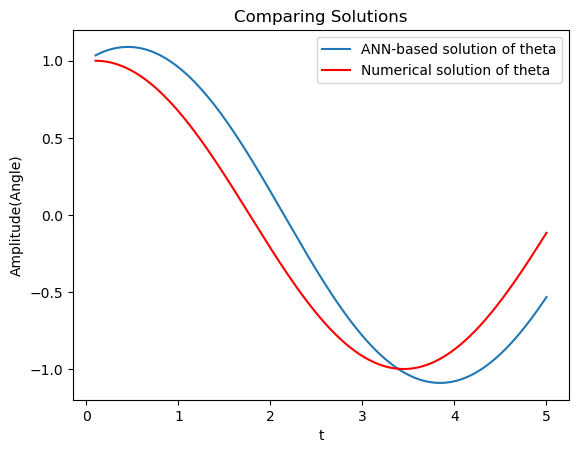

In [9]:
# plt.ion()
# plt.ioff()
# plt.show()
plt.title("Comparing Solutions")
plt.ylabel('Amplitude(Angle)')
plt.xlabel('t')
plt.plot(t, theta, label='ANN-based solution of theta')
plt.plot(t,theta_an,label='Numerical solution of theta', color = 'r')
# plt.plot(t, theta2, label='ANN-based solution of theta 2')
# plt.scatter(t,theta2_an,label='Analytical solution of theta 2',marker=".")
plt.legend()
plt.show()